데이터 불러오기

In [28]:
import pandas as pd
customer_master = pd.read_csv("../datasets/customer_master.csv")
customer_master.head() 

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [8]:
item_master  = pd.read_csv("../datasets/item_master.csv")
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [11]:
transaction_1 = pd.read_csv("../datasets/transaction_1.csv")
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [19]:
transaction_detail_1 = pd.read_csv("../datasets/transaction_detail_1.csv")
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


데이터 결합하기

In [13]:
transaction_2 = pd.read_csv("../datasets/transaction_2.csv")
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [18]:
transaction = pd.concat([transaction_1, transaction_2], ignore_index= True)
# 만약 데이터를 옆으로 붙이고 싶으면 axis=1, ignore_index(인덱스를 새로 매길지)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [22]:
transaction_detail_2 = pd.read_csv("../datasets/transaction_detail_2.csv")
transaction_detail = pd.concat([transaction_detail_1
                                ,transaction_detail_2],ignore_index= True)
transaction_detail

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
7139,7139,T0000006894,S004,1
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1


매출 데이터 끼리 조인

In [27]:
join_data = pd.merge(transaction_detail, transaction[['transaction_id'
                                                      ,'payment_date','customer_id']],
                                                      on = 'transaction_id', how = 'left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


마스터데이터를 결합(조인)해 보자

In [29]:
join_data = pd.merge(join_data, customer_master,on = "customer_id",how = 'left')
join_data = pd.merge(join_data, item_master, on = 'item_id', how = 'left')
join_data

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시,PC-D,180000
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시,PC-B,85000
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시,PC-A,50000
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시,PC-B,85000


필요한 데이터 컬럼을 만들기

In [30]:
join_data['price'] = join_data['quantity'] * join_data["item_price"]
join_data[['quantity','item_price','price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


데이터 검산하기

In [33]:
print(join_data['price'].sum())
print(transaction['price'].sum())

join_data["price"].sum() == transaction['price'].sum()

971135000
971135000


np.True_

각종 통계량을 파악하자

In [34]:
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [35]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


월별로 데이터를 집계해보자

In [38]:
join_data["payment_date"] = pd.to_datetime(
    join_data['payment_date'],
    format='%Y%m',  # '201902' → 2019-02-01
    errors='coerce' # 에러나면 NaT로 처리
)
join_data['payment_month'] = join_data['payment_date'].dt.strftime('%Y%m')
join_data[["payment_date","payment_month"]].head()

,payment_date,payment_month
0,2019-02-01,201902
1,2019-02-01,201902
2,2019-02-01,201902
3,2019-02-01,201902
4,2019-02-01,201902


In [40]:
join_data.groupby("payment_month")['price'].sum()

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

월별 데이터 상품 별로 데이터를 집계해보자

In [43]:
join_data.groupby(['payment_month','item_name'])[['price','quantity']].sum()

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [44]:
pd.pivot_table(join_data, index="item_name",columns='payment_month', values=[
    'price','quantity'
],aggfunc = 'sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

상품별 매출 추이를 가시화

In [46]:
graph_data = pd.pivot_table(join_data, index="item_name",columns='payment_month', values=
    'price',aggfunc = 'sum')
graph_data.head()

payment_month,201902,201903,201904,201905,201906,201907
item_name,,,,,,
PC-A,24150000,26000000,25900000,24850000,26000000,25250000
PC-B,25245000,25500000,23460000,25330000,23970000,28220000
PC-C,19800000,19080000,21960000,20520000,21840000,19440000
PC-D,31140000,25740000,24300000,25920000,28800000,26100000
PC-E,59850000,64050000,64890000,58800000,63420000,71610000


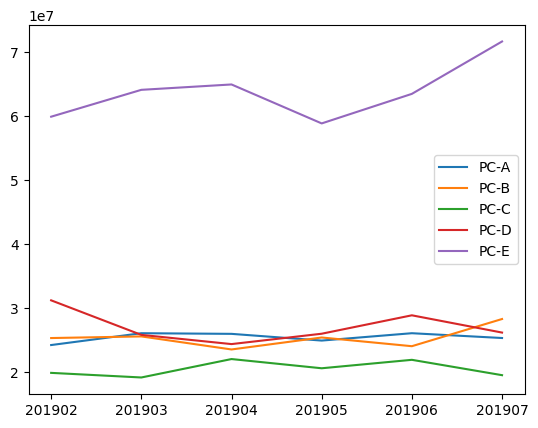

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(graph_data.columns, graph_data.loc['PC-A'], label='PC-A')
plt.plot(graph_data.columns, graph_data.loc['PC-B'], label='PC-B')
plt.plot(graph_data.columns, graph_data.loc['PC-C'], label='PC-C')
plt.plot(graph_data.columns, graph_data.loc['PC-D'], label='PC-D')
plt.plot(graph_data.columns, graph_data.loc['PC-E'], label='PC-E')

plt.legend()
plt.show()